### Libraries and data

In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow_addons import losses
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')




data = pd.read_csv(r"C:\Users\Superuser\Desktop\Datasets\Test_Dataset.csv", low_memory=False)

#### nulls everywhere! data requires an extensive 'per-column' analysis to properly decide what method would be best per column in treating these nulls

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80900 entries, 0 to 80899
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80900 non-null  int64  
 1   Client_Income               78466 non-null  object 
 2   Car_Owned                   78495 non-null  float64
 3   Bike_Owned                  78414 non-null  float64
 4   Active_Loan                 78446 non-null  float64
 5   House_Own                   78553 non-null  float64
 6   Child_Count                 78572 non-null  float64
 7   Credit_Amount               78613 non-null  object 
 8   Loan_Annuity                77697 non-null  object 
 9   Accompany_Client            79692 non-null  object 
 10  Client_Income_Type          78399 non-null  object 
 11  Client_Education            78550 non-null  object 
 12  Client_Marital_Status       78457 non-null  object 
 13  Client_Gender               792

In [49]:
data.isnull().sum()

ID                                0
Client_Income                  2434
Car_Owned                      2405
Bike_Owned                     2486
Active_Loan                    2454
House_Own                      2347
Child_Count                    2328
Credit_Amount                  2287
Loan_Annuity                   3203
Accompany_Client               1208
Client_Income_Type             2501
Client_Education               2350
Client_Marital_Status          2443
Client_Gender                  1627
Loan_Contract_Type             2321
Client_Housing_Type            2408
Population_Region_Relative     3270
Age_Days                       2479
Employed_Days                  2421
Registration_Days              2398
ID_Days                        3881
Own_House_Age                 53581
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             27845
Client_Family_Members          1644
Cleint_City_Rating          

#### For simplicity and to showcase model results we will drop all NaNs. 

In [3]:
data = data.dropna()

data.isnull().sum()

ID                            0
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Own_House_Age                 0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_C

#### Note that a lot of data is lost BUT sample size is still large enough to make inferences n=2568

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80900 entries, 0 to 80899
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80900 non-null  int64  
 1   Client_Income               78466 non-null  object 
 2   Car_Owned                   78495 non-null  float64
 3   Bike_Owned                  78414 non-null  float64
 4   Active_Loan                 78446 non-null  float64
 5   House_Own                   78553 non-null  float64
 6   Child_Count                 78572 non-null  float64
 7   Credit_Amount               78613 non-null  object 
 8   Loan_Annuity                77697 non-null  object 
 9   Accompany_Client            79692 non-null  object 
 10  Client_Income_Type          78399 non-null  object 
 11  Client_Education            78550 non-null  object 
 12  Client_Marital_Status       78457 non-null  object 
 13  Client_Gender               792

#### Converting to float

In [75]:
mode1 = data['Client_Income'].mode().iloc[0]  
data['Client_Income'].fillna(mode1, inplace=True)
data['Client_Income'] = data['Client_Income'].replace('$', mode1)

mode2 = data['Score_Source_3'].mode().iloc[0]  
data['Score_Source_3'].fillna(mode2, inplace=True)
data['Score_Source_3'] = data['Score_Source_3'].replace('#', mode2)

mode3 = data['Credit_Amount'].mode().iloc[0]  
data['Credit_Amount'].fillna(mode3, inplace=True)
data['Credit_Amount'] = data['Credit_Amount'].replace('$', mode3)

mode4 = data['Loan_Annuity'].mode().iloc[0]  
data['Loan_Annuity'].fillna(mode4, inplace=True)
data['Loan_Annuity'] = data['Loan_Annuity'].replace('#VALUE!', mode4)

In [76]:
data[data['Loan_Annuity'] == '#VALUE!']

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau


In [77]:
data['Client_Income'] = data['Client_Income'].astype(float)
data['Score_Source_3'] = data['Score_Source_3'].astype(float)
data['Credit_Amount'] = data['Credit_Amount'].astype(float)
data['Loan_Annuity'] = data['Loan_Annuity'].astype(float)
data['Population_Region_Relative'] = data['Population_Region_Relative'].astype(float)
data['Age_Days'] = data['Age_Days'].astype(float)
data['Employed_Days'] = data['Employed_Days'].astype(float)
data['Registration_Days'] = data['Registration_Days'].astype(float)
data['ID_Days'] = data['ID_Days'].astype(float)
data['Score_Source_2'] = data['Score_Source_2'].astype(float)


ValueError: could not convert string to float: '@'

#### Addressing object and numeric 

In [10]:
object_columns = data.select_dtypes(include=['object']).copy()
numeric_columns = data.select_dtypes(include=['number']).copy()

print("Object Columns:")
print(object_columns.columns)
print("\nNumeric Columns:")
print(numeric_columns.columns)

Object Columns:
Index(['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Client_Occupation',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_2', 'Score_Source_3'],
      dtype='object')

Numeric Columns:
Index(['ID', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1',
       'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau'],
      dtype='object')


#### upon inspection we see that there is only one value in column, this will cause a 'Singular Matrix' Error

In [372]:
numeric_columns['Mobile_Tag'].unique(), numeric_columns['Car_Owned'].unique()

(array([1], dtype=int64), array([1.]))

In [373]:
numeric_columns = numeric_columns.drop(['Mobile_Tag', 'Car_Owned'], axis='columns').copy()

# Logit

#### Check categoricals for significance

In [374]:
data_encoded = object_columns
label_encoders = {}  

for col in data_encoded:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le


X = data_encoded

 
X = X.astype(float)
y = data['Default'].astype(float)

 
class_weights = {0: 1, 1: 1}   

 
model = sm.Logit(y, sm.add_constant(X))
result = model.fit(method='newton', maxiter=1000, full_output=True, disp=True)

 
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.230681
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2568
Model:                          Logit   Df Residuals:                     2556
Method:                           MLE   Df Model:                           11
Date:                Fri, 01 Sep 2023   Pseudo R-squ.:                 0.02858
Time:                        20:53:12   Log-Likelihood:                -592.39
converged:                       True   LL-Null:                       -609.81
Covariance Type:            nonrobust   LLR p-value:                 0.0002621
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.8507      0.590     -6.524      0.000      

###### Client_Education, Client_Occupation, Loan_Contract_Type are all significant at level alpha = .1

#### Check numericals for significance

In [375]:
X = numeric_columns.drop('Default', axis='columns')

X = X.astype(float)
y = data['Default'].astype(float)

class_weights = {0: 1, 1: 1}  

model = sm.Logit(y, sm.add_constant(X))
result = model.fit(method='newton', maxiter=1000, full_output=True, disp=True)

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.200777
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2568
Model:                          Logit   Df Residuals:                     2541
Method:                           MLE   Df Model:                           26
Date:                Fri, 01 Sep 2023   Pseudo R-squ.:                  0.1545
Time:                        20:53:22   Log-Likelihood:                -515.60
converged:                       True   LL-Null:                       -609.81
Covariance Type:            nonrobust   LLR p-value:                 1.410e-26
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -17.6258     29.565     -0.596      0.551     -

###### House_Own, Population_Region_Relative, Employed_Days, Own_House_Age, Cleint_City_Rating, Application_Process_Day, Score_Source_1, Score_Source_2, Score_Source_3, Credit_Bureau are all significant at level alpha = .1

#### Mix of categorical and numeric

In [376]:
data_encoded = data.copy()  
label_encoders = {}   

selected_object_columns = object_columns[['Client_Education', 'Client_Occupation', 'Loan_Contract_Type']]
selected_numeric_columns = numeric_columns[['House_Own', 'Population_Region_Relative', 'Employed_Days',
                            'Own_House_Age', 'Cleint_City_Rating', 'Application_Process_Day', 'Score_Source_1', 
                            'Score_Source_2', 'Score_Source_3', 'Credit_Bureau']]

for col in selected_object_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le


X = pd.concat([selected_object_columns, selected_numeric_columns], axis=1)

X = X.astype(float)
y = data['Default'].astype(float)

class_weights = {0: 1, 1: 1}  

model = sm.Logit(y, sm.add_constant(X))
result = model.fit(method='newton', maxiter=1000, full_output=True, disp=True)

print(result.summary())



Optimization terminated successfully.
         Current function value: 0.199098
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2568
Model:                          Logit   Df Residuals:                     2554
Method:                           MLE   Df Model:                           13
Date:                Fri, 01 Sep 2023   Pseudo R-squ.:                  0.1616
Time:                        20:53:30   Log-Likelihood:                -511.28
converged:                       True   LL-Null:                       -609.81
Covariance Type:            nonrobust   LLR p-value:                 5.477e-35
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.4767      0.685     -3.618      0.000      

##### Dropping Credit_Bureau, Own_House_Age > alpha = .1

#### Final Selection of features to use in model

In [377]:

data_encoded = data.copy() 
label_encoders = {}   

selected_object_columns = object_columns[['Client_Education', 'Client_Occupation', 'Loan_Contract_Type']]
selected_numeric_columns = numeric_columns[['House_Own', 'Population_Region_Relative', 'Employed_Days',
                            'Cleint_City_Rating', 'Application_Process_Day', 'Score_Source_1', 
                            'Score_Source_2', 'Score_Source_3']]

for col in selected_object_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le


X = pd.concat([selected_object_columns, selected_numeric_columns], axis=1)


X = X.astype(float)
y = data['Default'].astype(float)


class_weights = {0: 1, 1: 1}  


model = sm.Logit(y, sm.add_constant(X))
result = model.fit(method='newton', maxiter=1000, full_output=True, disp=True)


print(result.summary())



Optimization terminated successfully.
         Current function value: 0.199826
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2568
Model:                          Logit   Df Residuals:                     2556
Method:                           MLE   Df Model:                           11
Date:                Fri, 01 Sep 2023   Pseudo R-squ.:                  0.1585
Time:                        20:55:52   Log-Likelihood:                -513.15
converged:                       True   LL-Null:                       -609.81
Covariance Type:            nonrobust   LLR p-value:                 1.802e-35
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.4379      0.676     -3.607      0.000      

## All features significant at roughly alpha = .05
#### There may be some multicolinearity here but let's go with this for now

#### Copying relevant columns for analysis 

In [457]:
df1 = data[['Default',
            'Client_Occupation', 
          'Client_Education', 
          'Score_Source_1',
          'Score_Source_2',
          'Score_Source_3',
          'Cleint_City_Rating',
          'Own_House_Age',
          'House_Own',
          'Loan_Contract_Type',
            'Population_Region_Relative', 
            'Application_Process_Day',
            'Employed_Days'
           
           ]].copy()

### Encode categoricals

In [458]:

df2 = pd.get_dummies(data=df1, columns=[
         'Client_Occupation', 
              'Client_Education', 
              'Cleint_City_Rating',
              'Own_House_Age',
              'House_Own',
              'Loan_Contract_Type'])


df2.columns



Index(['Default', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3',
       'Population_Region_Relative', 'Application_Process_Day',
       'Employed_Days', 'Client_Occupation_Accountants',
       'Client_Occupation_Cleaning', 'Client_Occupation_Cooking',
       'Client_Occupation_Core', 'Client_Occupation_Drivers',
       'Client_Occupation_HR', 'Client_Occupation_High skill tech',
       'Client_Occupation_IT', 'Client_Occupation_Laborers',
       'Client_Occupation_Low-skill Laborers', 'Client_Occupation_Managers',
       'Client_Occupation_Medicine', 'Client_Occupation_Private service',
       'Client_Occupation_Realty agents', 'Client_Occupation_Sales',
       'Client_Occupation_Secretaries', 'Client_Occupation_Security',
       'Client_Occupation_Waiters/barmen', 'Client_Education_Graduation',
       'Client_Education_Graduation dropout',
       'Client_Education_Junior secondary', 'Client_Education_Post Grad',
       'Client_Education_Secondary', 'Cleint_City_Rating_1.0',
   

In [459]:
df2.sample(5)

,Default,Score_Source_1,Score_Source_2,Score_Source_3,Population_Region_Relative,Application_Process_Day,Employed_Days,Client_Occupation_Accountants,Client_Occupation_Cleaning,Client_Occupation_Cooking,...,Own_House_Age_37.0,Own_House_Age_38.0,Own_House_Age_39.0,Own_House_Age_46.0,Own_House_Age_64.0,Own_House_Age_65.0,House_Own_0.0,House_Own_1.0,Loan_Contract_Type_CL,Loan_Contract_Type_RL
91379,0,0.889079,0.727313,0.775155,0.032561,2.0,1067.0,False,False,False,...,False,False,False,False,True,False,False,True,True,False
490,0,0.744311,0.627137,0.738020,0.010147,2.0,837.0,False,False,False,...,False,False,False,False,False,False,True,False,True,False
20922,0,0.624381,0.522467,0.190706,0.018634,1.0,5118.0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
21306,0,0.687035,0.665440,0.367291,0.026392,2.0,3616.0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
87418,0,0.723707,0.690155,0.583238,0.003541,4.0,11376.0,False,False,False,...,False,False,False,False,False,False,False,True,True,False


### Convert to numeric

In [460]:
df2 = df2.astype(float)

df2.sample(5)

,Default,Score_Source_1,Score_Source_2,Score_Source_3,Population_Region_Relative,Application_Process_Day,Employed_Days,Client_Occupation_Accountants,Client_Occupation_Cleaning,Client_Occupation_Cooking,...,Own_House_Age_37.0,Own_House_Age_38.0,Own_House_Age_39.0,Own_House_Age_46.0,Own_House_Age_64.0,Own_House_Age_65.0,House_Own_0.0,House_Own_1.0,Loan_Contract_Type_CL,Loan_Contract_Type_RL
80614,1.0,0.467337,0.373327,0.092617,0.019101,1.0,184.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4304,0.0,0.589064,0.649671,0.610991,0.010006,3.0,2584.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
69777,0.0,0.688239,0.277728,0.586740,0.019689,4.0,2974.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
119611,0.0,0.387496,0.260801,0.747663,0.005313,2.0,397.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
41909,1.0,0.331456,0.160405,0.032294,0.025164,3.0,458.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [461]:
X = df2.drop('Default',axis='columns')
y = testLabels = df2.Default.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [462]:
y_train.value_counts(normalize=True)

Default
0.0    0.936222
1.0    0.063778
Name: proportion, dtype: float64

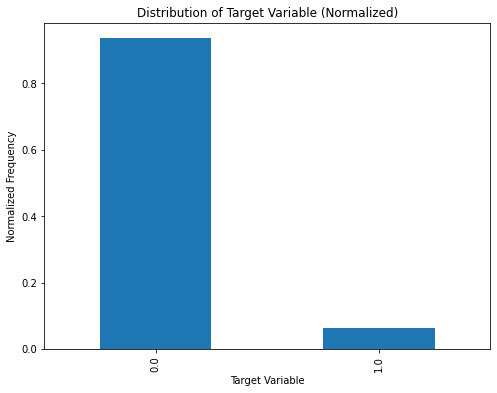

In [463]:
import matplotlib.pyplot as plt

value_counts_normalized = y.value_counts(normalize=True)

plt.figure(figsize=(8, 6))
value_counts_normalized.plot(kind='bar', color='red')
plt.title('Distribution of Target Variable (Normalized)')
plt.xlabel('Target Variable')
plt.ylabel('Normalized Frequency')
plt.show()

## There is a significant misproportion among the distribution of Default. This is an issue.

In [464]:
X_test.shape

(514, 79)

### Artifical Neural Network with Keras

In [470]:


def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(79, input_dim=79, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)
    roc_auc = roc_auc_score(y_test, y_preds)
    
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return y_preds



### Benchmark

Epoch 1/100
65/65 [==============================] - 8s 2ms/step - loss: 5.3770 - accuracy: 0.8958
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 1.3109 - accuracy: 0.8744
Epoch 3/100
65/65 [==============================] - 0s 2ms/step - loss: 1.4683 - accuracy: 0.8909
Epoch 4/100
65/65 [==============================] - 0s 2ms/step - loss: 0.7321 - accuracy: 0.9158
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 1.6663 - accuracy: 0.9026
Epoch 6/100
65/65 [==============================] - 0s 2ms/step - loss: 1.0428 - accuracy: 0.9094
Epoch 7/100
65/65 [==============================] - 0s 2ms/step - loss: 1.8593 - accuracy: 0.8948
Epoch 8/100
65/65 [==============================] - 0s 1ms/step - loss: 1.8596 - accuracy: 0.8948
Epoch 9/100
65/65 [==============================] - 0s 1ms/step - loss: 1.6679 - accuracy: 0.9017
Epoch 10/100
65/65 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.9109
Epoch 11/

65/65 [==============================] - 0s 1ms/step - loss: 0.9387 - accuracy: 0.9002
Epoch 84/100
65/65 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.9202
Epoch 85/100
65/65 [==============================] - 0s 1ms/step - loss: 0.7707 - accuracy: 0.9231
Epoch 86/100
65/65 [==============================] - 0s 1ms/step - loss: 1.5295 - accuracy: 0.9172
Epoch 87/100
65/65 [==============================] - 0s 1ms/step - loss: 0.9580 - accuracy: 0.9124
Epoch 88/100
65/65 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.9138
Epoch 89/100
65/65 [==============================] - 0s 1ms/step - loss: 0.8361 - accuracy: 0.9221
Epoch 90/100
65/65 [==============================] - 0s 1ms/step - loss: 1.1552 - accuracy: 0.9094
Epoch 91/100
65/65 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.9182
Epoch 92/100
65/65 [==============================] - 0s 1ms/step - loss: 0.3736 - accuracy: 0.9211
Epoch 93/100


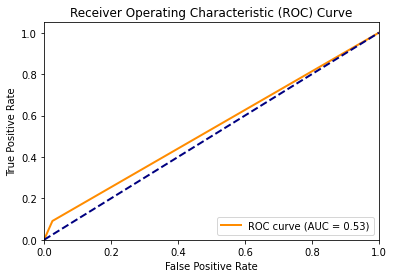

In [471]:
loss_function = 'binary_crossentropy' 
class_weights = {0: 1.0, 1: 1.0} 

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


## This is horrible in terms of our goal. F-1 score of .13 for predicting a loan default is no where near practical. This is most definitely due to class imbalance and must be addressed

### Oversampling

In [473]:
count_class_0, count_class_1 = df1.Default.value_counts()

df_class_0 = df2[df2['Default'] == 0]
df_class_1 = df2[df2['Default'] == 1]




In [474]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


print('Random over-sampling:')
print(df_test_over.Default.value_counts())


Random over-sampling:
Default
0.0    2404
1.0    2404
Name: count, dtype: int64


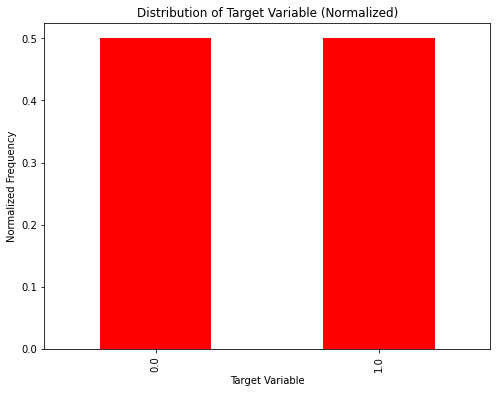

In [475]:
value_counts_normalized = df_test_over.Default.value_counts(normalize=True)

plt.figure(figsize=(8, 6))
value_counts_normalized.plot(kind='bar', color='red')
plt.title('Distribution of Target Variable (Normalized)')
plt.xlabel('Target Variable')
plt.ylabel('Normalized Frequency')
plt.show()

### Samples are now equally distributed eliminating class imbalance

# Train, Test, Split, Final Classification

In [476]:
X = df_test_over.drop('Default',axis='columns')
y = df_test_over['Default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


Epoch 1/100
121/121 [==============================] - 10s 2ms/step - loss: 2.8757 - accuracy: 0.5333
Epoch 2/100
121/121 [==============================] - 0s 2ms/step - loss: 0.9247 - accuracy: 0.5601
Epoch 3/100
121/121 [==============================] - 0s 2ms/step - loss: 0.8845 - accuracy: 0.5793
Epoch 4/100
121/121 [==============================] - 0s 2ms/step - loss: 0.7781 - accuracy: 0.5949
Epoch 5/100
121/121 [==============================] - 0s 1ms/step - loss: 0.6998 - accuracy: 0.6394
Epoch 6/100
121/121 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.6485
Epoch 7/100
121/121 [==============================] - 0s 2ms/step - loss: 0.7214 - accuracy: 0.6401
Epoch 8/100
121/121 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.6542
Epoch 9/100
121/121 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.6555
Epoch 10/100
121/121 [==============================] - 0s 2ms/step - loss: 0.6644 - accur

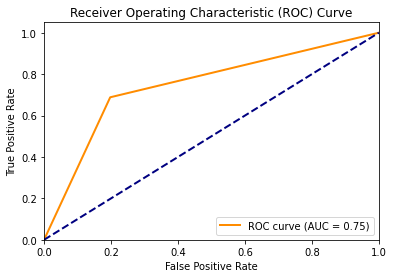

In [477]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

## Significant improvement in our f1-score

## SMOTE

In [478]:
X = df2.drop('Default',axis='columns')
y = df2['Default']


smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()



Default
0.0    2404
1.0    2404
Name: count, dtype: int64

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)


y_train.value_counts()



Default
1.0    1923
0.0    1923
Name: count, dtype: int64

Epoch 1/100
121/121 [==============================] - 10s 2ms/step - loss: 5.8066 - accuracy: 0.5237
Epoch 2/100
121/121 [==============================] - 0s 2ms/step - loss: 1.1625 - accuracy: 0.5660
Epoch 3/100
121/121 [==============================] - 0s 2ms/step - loss: 0.9821 - accuracy: 0.5962
Epoch 4/100
121/121 [==============================] - 0s 2ms/step - loss: 1.1268 - accuracy: 0.6050
Epoch 5/100
121/121 [==============================] - 0s 2ms/step - loss: 1.4430 - accuracy: 0.5975
Epoch 6/100
121/121 [==============================] - 0s 2ms/step - loss: 1.1686 - accuracy: 0.6147
Epoch 7/100
121/121 [==============================] - 0s 2ms/step - loss: 0.9561 - accuracy: 0.6482
Epoch 8/100
121/121 [==============================] - 0s 2ms/step - loss: 1.1869 - accuracy: 0.6170
Epoch 9/100
121/121 [==============================] - 0s 2ms/step - loss: 0.8443 - accuracy: 0.6706
Epoch 10/100
121/121 [==============================] - 0s 2ms/step - loss: 0.8736 - accur

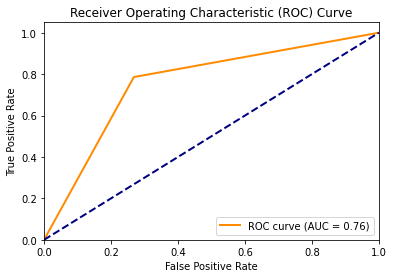

In [480]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)



## Incredible improvement in f1 score

## After experimenting these are the combined features I have found to give highest f-1

##### I claim: The default on a loan by a customer can be predicted by 1.a clients employment, 2.their educational backgroud, 3.the type of loan they have whether or not they 4.own a home and 5.the age of the home. Moreover, a clients 6.'Score_Source_3' plays a significant role as does 7.'Cleint_City_Rating' however, not much detail is provided on the context of these features. 

In [481]:
df1 = data[['Default',
            'Client_Occupation', 
          'Client_Education',
          'Score_Source_3',
          'Cleint_City_Rating',
          'Own_House_Age',
          'House_Own',
          'Loan_Contract_Type'
            
           
           ]].copy()



In [482]:

df2 = pd.get_dummies(data=df1, columns=[
         'Client_Occupation', 
              'Client_Education', 
              'Cleint_City_Rating',
              'House_Own',
'Own_House_Age',
              'Loan_Contract_Type'])

df2 = df2.astype(float)

#### Oversample

In [483]:
count_class_0, count_class_1 = df1.Default.value_counts()


df_class_0 = df2[df2['Default'] == 0]
df_class_1 = df2[df2['Default'] == 1]



df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


print('Random over-sampling:')
print(df_test_over.Default.value_counts())


X = df_test_over.drop('Default',axis='columns')
y = df_test_over['Default']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

Random over-sampling:
Default
0.0    2404
1.0    2404
Name: count, dtype: int64


In [484]:
X_train.shape

(3846, 74)

In [485]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, roc_auc_score

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(74, input_dim=74, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report:\n", classification_report(y_test, y_preds))
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)
    roc_auc = roc_auc_score(y_test, y_preds)
    
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return y_preds

Epoch 1/100
121/121 [==============================] - 10s 2ms/step - loss: 0.6520 - accuracy: 0.6360
Epoch 2/100
121/121 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7608
Epoch 3/100
121/121 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7962
Epoch 4/100
121/121 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8300
Epoch 5/100
121/121 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8502
Epoch 6/100
121/121 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8749
Epoch 7/100
121/121 [==============================] - 0s 2ms/step - loss: 0.2721 - accuracy: 0.8947
Epoch 8/100
121/121 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.9152
Epoch 9/100
121/121 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9228
Epoch 10/100
121/121 [==============================] - 0s 2ms/step - loss: 0.1990 - accur

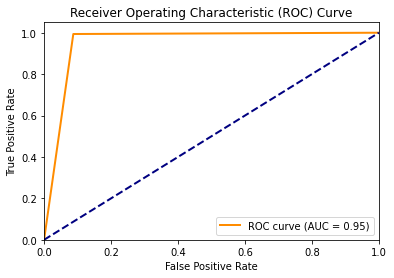

In [486]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

### Not too shabby of an f1-score if I say so myself

#### Synthetic Minority Oversampling Technique - SMOTE 

In [487]:
X = df2.drop('Default',axis='columns')
y = df2['Default']


smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Default
0.0    2404
1.0    2404
Name: count, dtype: int64

In [488]:

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)


y_train.value_counts()

Default
1.0    1923
0.0    1923
Name: count, dtype: int64

In [489]:
X_train.shape

(3846, 74)

## Adjust function dimension

In [491]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, roc_auc_score

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(74, input_dim=74, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report:\n", classification_report(y_test, y_preds))
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)
    roc_auc = roc_auc_score(y_test, y_preds)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    
    return y_preds

Epoch 1/100
121/121 [==============================] - 8s 1ms/step - loss: 0.6167 - accuracy: 0.6669
Epoch 2/100
121/121 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7767
Epoch 3/100
121/121 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8123
Epoch 4/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3579 - accuracy: 0.8513
Epoch 5/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8866
Epoch 6/100
121/121 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.9095
Epoch 7/100
121/121 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9236
Epoch 8/100
121/121 [==============================] - 0s 2ms/step - loss: 0.1874 - accuracy: 0.9373
Epoch 9/100
121/121 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9470
Epoch 10/100
121/121 [==============================] - 0s 2ms/step - loss: 0.1483 - accura

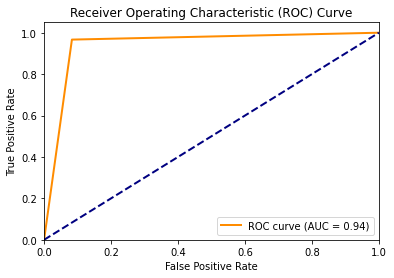

In [492]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)